# Script to detect faces and landmarks in images using dlib

### Following: https://www.pyimagesearch.com/2017/04/03/facial-landmarks-dlib-opencv-python/
#### conda environment(detect_face) configuration:
    - python 2
    - dlib (just google installation for conda) 
    - pip install --upgrade imutils
    - opencv (conda-forge)
    - matplotlib (to visualise inline)

In [10]:
sys.executable

'/home/amogh/anaconda3/envs/detect_face/bin/python2'

In [6]:
import sys

import cv2

## USAGE
# python facial_landmarks.py --shape-predictor shape_predictor_68_face_landmarks.dat --image images/example_01.jpg 

# import the necessary packages
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
args={"shape_predictor":"shape_predictor_68_face_landmarks.dat", "image":"face.jpg"}

In [14]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["shape_predictor"])

In [15]:
# load the input image, resize it, and convert it to grayscale
image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# detect faces in the grayscale image
rects = detector(gray, 1)

In [16]:
rects

rectangles[[(142, 142) (365, 365)]]

(68, 2)


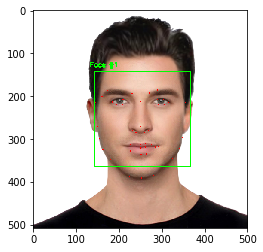

In [23]:
# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    print(shape.shape)
	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	# show the face number
    cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    text_file = open("landmarks"+str(i+1)+".txt", "w")
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
        text_file.write(str(x)+','+str(y)+'\n')
    text_file.close()
# cv2.imshow("im", image)
# cv2.waitKey(1000)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

## Cropping and aligning face